# Uber Taxi Supply Demand Gap
Data : Uber Request Data                      Source : kaggle.com

case study for data :1. City - Airport
                     2. Airport - city
Problem Statement :


    Find the gap between supply and demand and visualize it.
    Find the time slot when the highest Taxi demand is.
    check the gap is in Case 1 or Case 2 with its time slot.
    

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Uber Request Data.csv")

# creating a copy of data - df- will hold raw data df1 - will hold clean and transformed data
df1=df.copy()

In [70]:
df2=pd.read_csv("Uber Request Data.csv")
df2.shape

(6745, 6)

In [82]:
print("Total unique drivers are:", len(df2['Driver id'].value_counts())
)

Total unique drivers are: 300


In [78]:
df1.head()

,Pickup_Point,Status,Request_Timestamp,Drop_Timestamp,Date,WeekDay,Time_Session
0,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,Monday,Rush_Morning
1,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,Monday,Mid_Afternoon
2,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,Wednesday,Morning
3,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,Wednesday,Evening
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,Wednesday,Morning


In [4]:
# To check size of the data -- in rows and columns
df1.shape

(6745, 6)

In [5]:
# to get information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [6]:
# To get the name of columns
df1.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [7]:
# To check the data type of the columns
df1.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [8]:
# To check null values in the data
df1.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [9]:
# To get only name of the columns having null/Missing values with its count

null_columns=df1.columns[df.isnull().any()]
print("Missing values columns are : ", null_columns)

# To get the count of null/Missing values
print("Column Name   Missing value")
df1[null_columns].isnull().sum()



# How to retrieve rows for column having null values
#df[df['Drop timestamp'].isnull()][null_columns]

Missing values columns are :  Index(['Driver id', 'Drop timestamp'], dtype='object')
Column Name   Missing value


Driver id         2650
Drop timestamp    3914
dtype: int64

In [10]:
# Data Cleaning
# Changing name of the columns
df1.columns=['Request_Id', 'Pickup_Point', 'Driver_Id', 'Status', 'Request_Timestamp', 'Drop_Timestamp']

In [11]:
# The changed column names are
df1.columns

Index(['Request_Id', 'Pickup_Point', 'Driver_Id', 'Status',
       'Request_Timestamp', 'Drop_Timestamp'],
      dtype='object')

In [12]:
# data quality issue : Converting (Request timestamp, Drop timestamp) from object -> datetime format
#import datetime
df1['Request_Timestamp']=pd.to_datetime(df1['Request_Timestamp'])
df1['Drop_Timestamp']=pd.to_datetime(df1['Drop_Timestamp'])

In [13]:
# Drop the unnecessary column
df1.drop(['Request_Id'], axis=1, inplace=True)
df1.drop(['Driver_Id'], axis=1, inplace=True)


In [14]:
df1.head()

,Pickup_Point,Status,Request_Timestamp,Drop_Timestamp
0,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [15]:
# Get the unique value for each column
print("Pickup point unique value count: ", len(df1['Pickup_Point'].unique()))
print("Pickup point unique value are: ", df1['Pickup_Point'].unique())

Pickup point unique value count:  2
Pickup point unique value are:  ['Airport' 'City']


In [16]:
# Get the total value count for the Pickup Point
print("Pickup Point Count")
df1['Pickup_Point'].value_counts()

Pickup Point Count


City       3507
Airport    3238
Name: Pickup_Point, dtype: int64

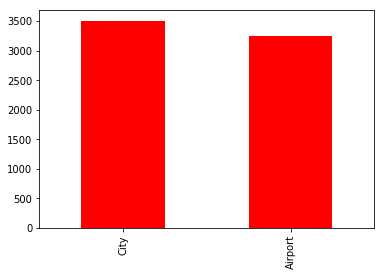

In [17]:
# Visualize the Pickup Point data
PPoint=df1['Pickup_Point'].value_counts()
PPoint.plot.bar(color='r')
# Or using another method
#PPoint=pd.crosstab(index=df1['Pickup_Point'], columns='count')
#PPoint.plot.bar()

In [18]:
print("Trip Status unique value count: ", len(df1['Status'].unique()))
print("Trip Status unique value are : ", df1['Status'].unique())


Trip Status unique value count:  3
Trip Status unique value are :  ['Trip Completed' 'Cancelled' 'No Cars Available']


In [19]:
# Get the total value count for the Trip Status
print("Trip Status          Count")
df1['Status'].value_counts()

Trip Status          Count


Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

NOTE : The Driver_Id missing value count and No Cars Available value count is same , so there was no missing value in Driver_Id. 

There was no trip took place so Driver_Id is unavailable.

When Trip will not took place, there will no Drop_Timestamp.
Drop_Timestamp count is equal to (No Cars Available + Cancelled) [3914 = (2650 + 1264).

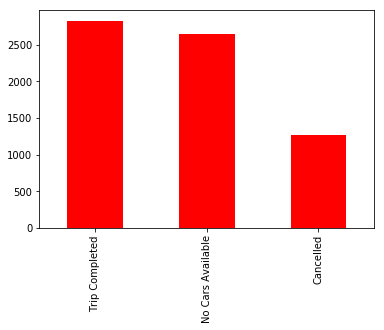

In [20]:
# Visualize the trip Status Data 
#Trip_Status=pd.crosstab(index=df1['Status'], columns='count')
#Trip_Status.plot.bar()

# Visualize the Trip Status data
TripStatus=df1['Status'].value_counts()
TripStatus.plot.bar(color='r')


In [21]:
df1.head(1)

,Pickup_Point,Status,Request_Timestamp,Drop_Timestamp
0,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00


In [22]:
# Created a new column Date to the dataset from Request_Timestamp
df1['Date']=pd.DatetimeIndex(df1['Request_Timestamp']).date
df1.Date=pd.to_datetime(df1.Date)



In [23]:
df1['WeekDay']=df1.Date.dt.weekday_name

In [24]:
df1.head()

,Pickup_Point,Status,Request_Timestamp,Drop_Timestamp,Date,WeekDay
0,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,Monday
1,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,Monday
2,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,Wednesday
3,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,Wednesday
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,Wednesday


##### To check the day time cars status
Day Time is divided into 8 bins :
    
    Mid_Night      :  00AM - 3AM

    Early_Morning  :   3AM - 6AM

    Morning        :   6AM - 9AM

    Rush_Morning   :   9AM - 12AM

    Afternoon      :  12PM - 15PM

    Mid_Afternoon  :  15PM - 18PM

    Evening        :  18PM - 21PM

    Night          :  21Pm - 00AM 



In [25]:
# dividing the rides in 8 section -Mid_Night, Early_Monrning, Morning , Rush_Morning , Afternoon, Mid_Afternoon, Evening , Night
time_labels=['Mid_Night','Early_Morning','Morning','Rush_Morning','Afternoon','Mid_Afternoon', 'Evening', 'Night']
df1=df1.assign(Time_Session=pd.cut(df1['Request_Timestamp'].dt.hour,[-1,3,6,9,12,15,18,21,24], labels=time_labels))

In [26]:
df1.head(3)

,Pickup_Point,Status,Request_Timestamp,Drop_Timestamp,Date,WeekDay,Time_Session
0,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,Monday,Rush_Morning
1,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,Monday,Mid_Afternoon
2,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,Wednesday,Morning


In [27]:
df1['Time_Session'].value_counts()

Evening          1414
Morning          1260
Mid_Afternoon    1087
Early_Morning    1046
Rush_Morning      598
Night             498
Afternoon         467
Mid_Night         375
Name: Time_Session, dtype: int64

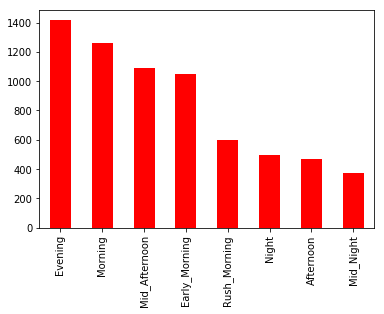

In [28]:
# Visualize the trip Time_Session Data with its total count 
#TimeSession=pd.crosstab(index=df1['Time_Session'], columns='count')
#print(TimeSession)
#TimeSession.plot.bar()

# Visualize the Pickup Point data
Ts=df1['Time_Session'].value_counts()
Ts.plot.bar(color='r')


In [29]:
print("       Date")
print(df1.Date.head())
print("\n Unique days of the trips ")
print("Date     Total_Trip_count")

print(df1.Date.value_counts())
#df1.Date.dt.weekday_name


       Date
0   2016-11-07
1   2016-11-07
2   2016-12-07
3   2016-12-07
4   2016-07-13
Name: Date, dtype: datetime64[ns]

 Unique days of the trips 
Date     Total_Trip_count
2016-07-15    1381
2016-11-07    1367
2016-07-14    1353
2016-07-13    1337
2016-12-07    1307
Name: Date, dtype: int64


In [30]:
df1.WeekDay.value_counts()

Wednesday    2644
Friday       1381
Monday       1367
Thursday     1353
Name: WeekDay, dtype: int64

### Visualize the WeekDay Trip Status

Observation : with compare to other week days
1. Large amount of trip took place on Wednesday.
2. On Wednesday:

"Cancellation" is more ,

"No Cars Availabe"  is almost twice than other days, 

"Trip Completed" is also almost twice than other days. 

So Looking to the data we can say Wednesday is the "Most Heavy Day of the Week"


In [31]:
df1.head()

,Pickup_Point,Status,Request_Timestamp,Drop_Timestamp,Date,WeekDay,Time_Session
0,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,Monday,Rush_Morning
1,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,Monday,Mid_Afternoon
2,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,Wednesday,Morning
3,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,Wednesday,Evening
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,Wednesday,Morning


### Analyse the data with Pickup Point

In [33]:
df1.head()

,Pickup_Point,Status,Request_Timestamp,Drop_Timestamp,Date,WeekDay,Time_Session
0,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,Monday,Rush_Morning
1,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,Monday,Mid_Afternoon
2,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,Wednesday,Morning
3,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,Wednesday,Evening
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,Wednesday,Morning


##### Pickup_Point and Status data

In [34]:
# Pickupoint and Status data 
df1.groupby(['Pickup_Point','Status']).size()

Pickup_Point  Status           
Airport       Cancelled             198
              No Cars Available    1713
              Trip Completed       1327
City          Cancelled            1066
              No Cars Available     937
              Trip Completed       1504
dtype: int64

In [35]:
# Pivot the above data
#  Status and Pickupoint data 
df1.groupby(['Status', 'Pickup_Point']).size()

Status             Pickup_Point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

In [36]:
pd.crosstab(df1['Status'],df1['Pickup_Point'], margins=True)
#pd.crosstab(df1['Pickup_Point'], df1['Status'], margins=True)

Pickup_Point,Airport,City,All
Status,,,
Cancelled,198,1066,1264
No Cars Available,1713,937,2650
Trip Completed,1327,1504,2831
All,3238,3507,6745


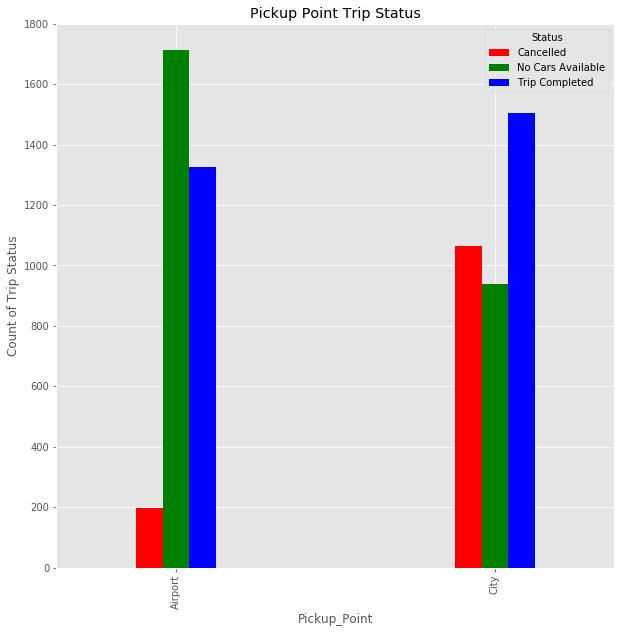

In [37]:
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
colors=['r','g','b']
width=0.25
Status_graph=df1.groupby(['Pickup_Point', 'Status']).Status.count().unstack().plot.bar(legend=True,width=width, figsize=(10,10), color=colors)
plt.xlabel=('Pickup Point')
plt.ylabel("Count of Trip Status")
plt.title("Pickup Point Trip Status")

plt.show()

Observation :

1. Few Cars Available at Airport : Can have "Uber Taxi Stand" with more cars.
2. Many Cancellation from City-to- Airport : "due to heavy traffic time?" "Due to odd time zone?"
3. Check the 'cancellation'  and 'No car available' wrt to "Time_Session"

##### Pickup_Point and Weekday data visualization
To check which weekday is having heavy rush

In [38]:
# Pivot the data 
df1.groupby(['WeekDay','Pickup_Point']).size()

WeekDay    Pickup_Point
Friday     Airport          629
           City             752
Monday     Airport          661
           City             706
Thursday   Airport          601
           City             752
Wednesday  Airport         1347
           City            1297
dtype: int64

In [39]:

pd.crosstab(df1['Pickup_Point'],df1['WeekDay'], margins=True)
#pd.crosstab(df1['WeekDay'], df1['Pickup_Point'], margins=True)

WeekDay,Friday,Monday,Thursday,Wednesday,All
Pickup_Point,,,,,
Airport,629,661,601,1347,3238
City,752,706,752,1297,3507
All,1381,1367,1353,2644,6745


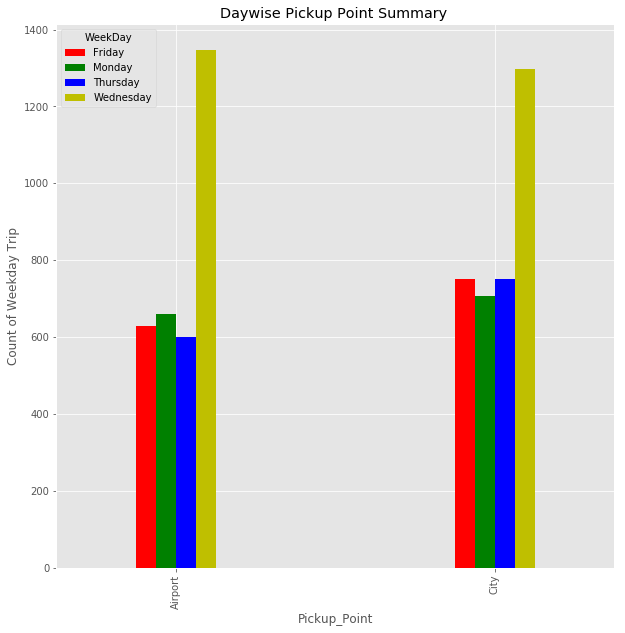

In [40]:
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
colors=['r','g','b','y','k','p','m']
width=0.25
Status_graph=df1.groupby(['Pickup_Point', 'WeekDay']).WeekDay.count().unstack().plot.bar(legend=True, width=width ,figsize=(10,10), color=colors)
plt.xlabel=('Pickup Point')
plt.ylabel("Count of Weekday Trip")
plt.title("Daywise Pickup Point Summary ")

plt.show()

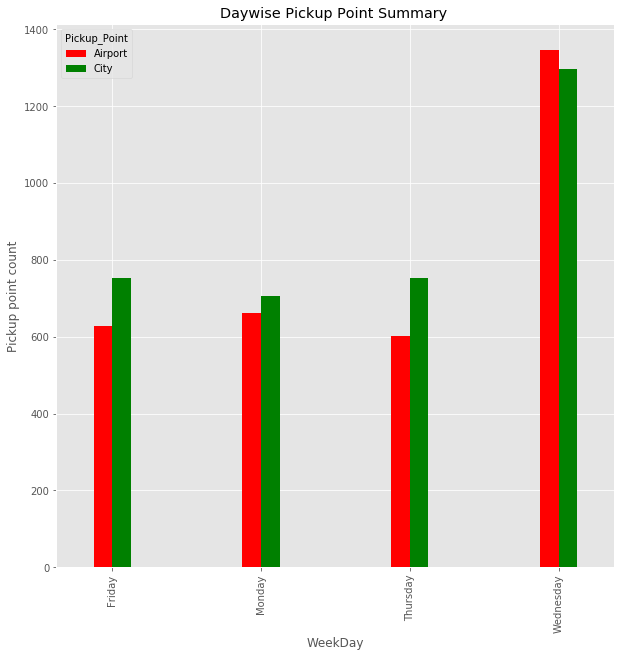

In [41]:
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
colors=['r','g']
width=0.25
Status_graph=df1.groupby(['WeekDay', 'Pickup_Point']).Pickup_Point.count().unstack().plot.bar(legend=True, width=width ,figsize=(10,10), color=colors)
plt.xlabel=('Weekday')
plt.ylabel("Pickup point count")
plt.title("Daywise Pickup Point Summary ")

plt.show()

In [42]:
df1.groupby(['Pickup_Point', 'Time_Session']).size()

Pickup_Point  Time_Session 
Airport       Mid_Night         181
              Early_Morning     253
              Morning           245
              Rush_Morning      226
              Afternoon         191
              Mid_Afternoon     774
              Evening          1087
              Night             281
City          Mid_Night         194
              Early_Morning     793
              Morning          1015
              Rush_Morning      372
              Afternoon         276
              Mid_Afternoon     313
              Evening           327
              Night             217
dtype: int64

In [43]:
df1.groupby(['Time_Session','Pickup_Point']).size()

Time_Session   Pickup_Point
Mid_Night      Airport          181
               City             194
Early_Morning  Airport          253
               City             793
Morning        Airport          245
               City            1015
Rush_Morning   Airport          226
               City             372
Afternoon      Airport          191
               City             276
Mid_Afternoon  Airport          774
               City             313
Evening        Airport         1087
               City             327
Night          Airport          281
               City             217
dtype: int64

In [44]:
pd.crosstab(df1['Time_Session'], df1['Pickup_Point'], margins=True)
pd.crosstab( df1['Pickup_Point'],df1['Time_Session'], margins=True)

Time_Session,Mid_Night,Early_Morning,Morning,Rush_Morning,Afternoon,Mid_Afternoon,Evening,Night,All
Pickup_Point,,,,,,,,,
Airport,281,191,245,181,774,253,226,1087,3238
City,217,276,1015,194,313,793,372,327,3507
All,498,467,1260,375,1087,1046,598,1414,6745


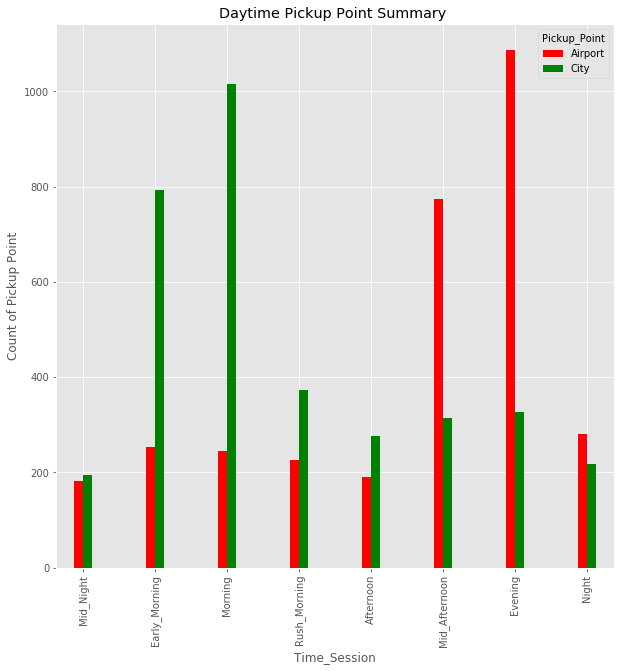

In [45]:
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
colors=['r','g','b','y','k','l','m','v']
width=0.25
Status_graph=df1.groupby(['Time_Session', 'Pickup_Point']).Pickup_Point.count().unstack().plot.bar(legend=True, width=width ,figsize=(10,10), color=colors)
plt.xlabel=('Time Session')
plt.ylabel("Count of Pickup Point")
plt.title("Daytime Pickup Point Summary ")

plt.show()

In [46]:
df1.tail()

,Pickup_Point,Status,Request_Timestamp,Drop_Timestamp,Date,WeekDay,Time_Session
6740,City,No Cars Available,2016-07-15 23:49:03,NaT,2016-07-15,Friday,Night
6741,Airport,No Cars Available,2016-07-15 23:50:05,NaT,2016-07-15,Friday,Night
6742,City,No Cars Available,2016-07-15 23:52:06,NaT,2016-07-15,Friday,Night
6743,City,No Cars Available,2016-07-15 23:54:39,NaT,2016-07-15,Friday,Night
6744,Airport,No Cars Available,2016-07-15 23:55:03,NaT,2016-07-15,Friday,Night


In [47]:
df1.groupby(['Status', 'WeekDay']).size()

Status             WeekDay  
Cancelled          Friday        240
                   Monday        262
                   Thursday      252
                   Wednesday     510
No Cars Available  Friday        580
                   Monday        504
                   Thursday      571
                   Wednesday     995
Trip Completed     Friday        561
                   Monday        601
                   Thursday      530
                   Wednesday    1139
dtype: int64

In [48]:
# Pivot the data 
df1.groupby(['WeekDay','Status']).size()

WeekDay    Status           
Friday     Cancelled             240
           No Cars Available     580
           Trip Completed        561
Monday     Cancelled             262
           No Cars Available     504
           Trip Completed        601
Thursday   Cancelled             252
           No Cars Available     571
           Trip Completed        530
Wednesday  Cancelled             510
           No Cars Available     995
           Trip Completed       1139
dtype: int64

In [49]:
pd.crosstab(df1['Status'],df1['WeekDay'], margins=True)
#pd.crosstab( df1['Status'],df1['WeekDay'], margins=True)

WeekDay,Friday,Monday,Thursday,Wednesday,All
Status,,,,,
Cancelled,240,262,252,510,1264
No Cars Available,580,504,571,995,2650
Trip Completed,561,601,530,1139,2831
All,1381,1367,1353,2644,6745


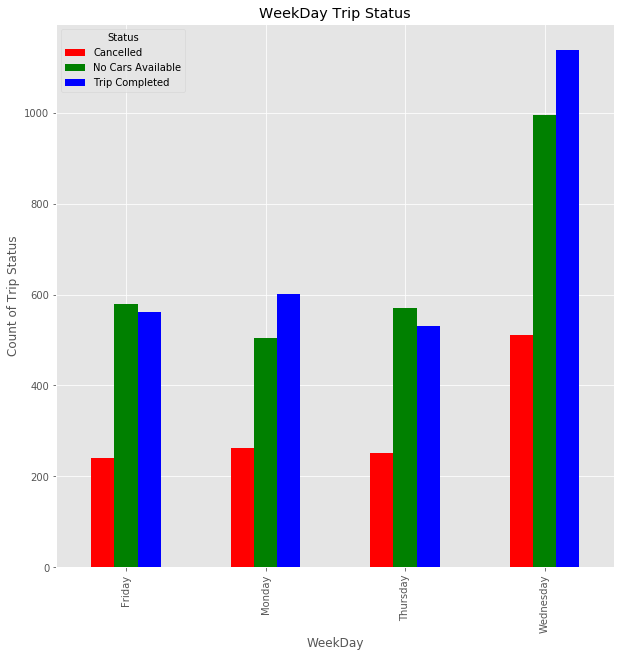

In [50]:
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
colors=['r','g','b']
Status_graph=df1.groupby(['WeekDay', 'Status']).Status.count().unstack().plot.bar(legend=True, figsize=(10,10), color=colors)
plt.xlabel=('WeekDay')
plt.ylabel("Count of Trip Status")
plt.title("WeekDay Trip Status")

plt.show()

In [51]:
pd.crosstab(df1['Time_Session'], df1['Status'], margins=True)
#pd.crosstab( df1['Status'],df1['WeekDay'], margins=True)

Status,Cancelled,No Cars Available,Trip Completed,All
Time_Session,,,,
Rush_Morning,14,225,136,375
Mid_Afternoon,372,244,430,1046
Morning,522,236,502,1260
Evening,96,150,352,598
Early_Morning,50,138,279,467
Afternoon,81,600,406,1087
Night,107,838,469,1414
Mid_Night,22,219,257,498
All,1264,2650,2831,6745


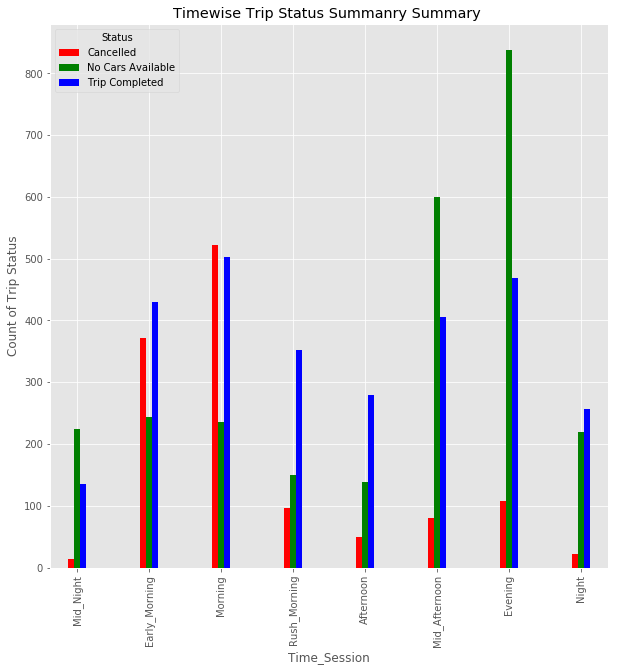

In [52]:
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
colors=['r','g','b']
width=0.25
Status_graph=df1.groupby(['Time_Session', 'Status']).Status.count().unstack().plot.bar(legend=True, width=width ,figsize=(10,10), color=colors)
plt.xlabel=('Time Session')
plt.ylabel("Count of Trip Status")
plt.title("Timewise Trip Status Summanry Summary ")

plt.show()

#### Deeper Analysis for Status=cancelled, status=No cars available 

In [53]:
# filtering the Cancelled trips
df1_cancelled=df1[df1.Status=='Cancelled']
df1_cancelled.shape
#df1.Status.value_counts()
                        

(1264, 7)

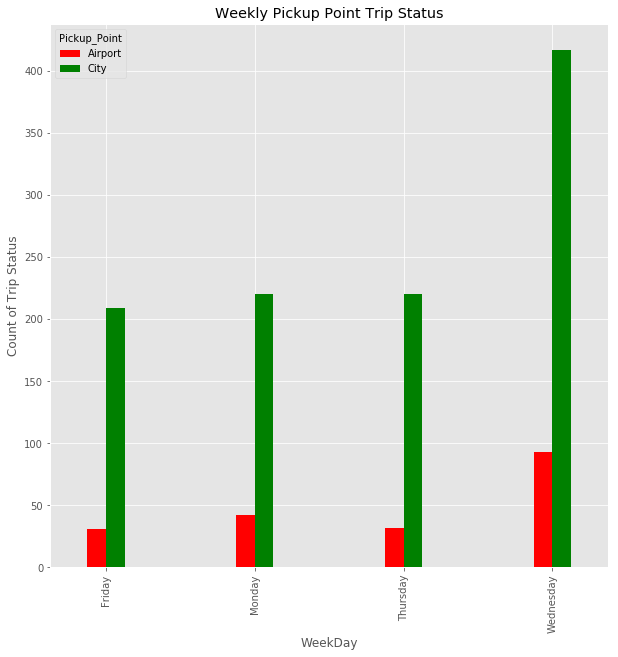

In [54]:
# With respect to Pickup_Point Trip cancellation data distribution
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
colors=['r','g','b']
width=0.25
Status_graph=df1_cancelled.groupby(['WeekDay', 'Pickup_Point']).Pickup_Point.count().unstack().plot.bar(legend=True,width=width, figsize=(10,10), color=colors)
plt.xlabel=('Pickup Point')
plt.ylabel("Count of Trip Status")
plt.title("Weekly Pickup Point Trip Status")

plt.show()

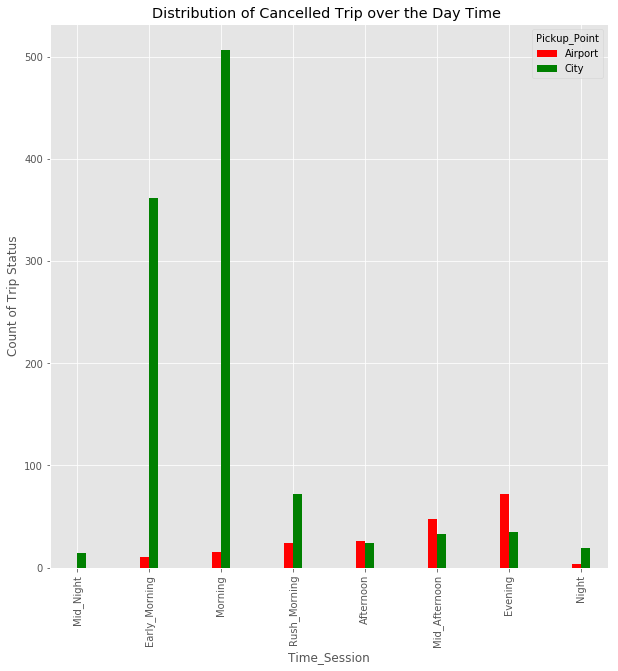

In [55]:
# With respect to Day time  Trip cancellation data distribution
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
colors=['r','g','b']
width=0.25
Status_graph=df1_cancelled.groupby(['Time_Session', 'Pickup_Point']).Pickup_Point.count().unstack().plot.bar(legend=True,width=width, figsize=(10,10), color=colors)
plt.xlabel=('Day Time Session')
plt.ylabel("Count of Trip Status")
plt.title("Distribution of Cancelled Trip over the Day Time ")

plt.show()

Observation : 
    from Pickup_Point= City
    Highest cancellation took place  at 
    Early_Morning( 3AM-6AM)
    Morning      (6AM-9AM)
    Followed by Rush_Morning (9AM-12AM)
    
    from Pickup_Point= Airport
    Cancellation Took place in 
    Evening (6AM-9AM) - May be due to heavy rush/Traffic
    Mid-Afternoon -(3AM-6AM)

In [57]:
df1_NoCarAvailable=df1[df1.Status=='No Cars Available']
df1_NoCarAvailable.shape

(2650, 7)

In [64]:
pd.crosstab(df1_NoCarAvailable['Time_Session'], df1_NoCarAvailable['Pickup_Point'], margins=True)
#groupby(['Time_Session','Pickup_Point']).Pickup_Point.count()

Pickup_Point,Airport,City,All
Time_Session,,,
Mid_Night,114,111,225
Early_Morning,41,203,244
Morning,14,222,236
Rush_Morning,37,113,150
Afternoon,41,97,138
Mid_Afternoon,533,67,600
Evening,797,41,838
Night,136,83,219
All,1713,937,2650


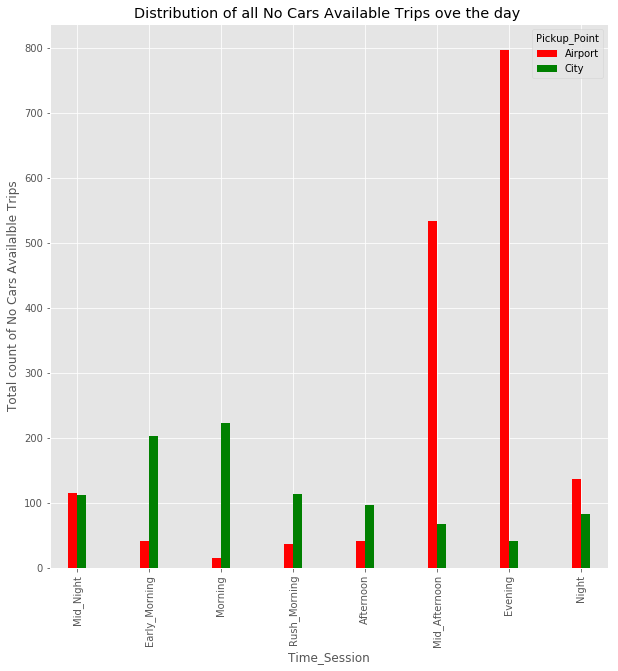

In [61]:
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
colors=['r','g','b']
width=0.25
Status_graph=df1_NoCarAvailable.groupby(['Time_Session','Pickup_Point']).Pickup_Point.count().unstack().plot.bar(legend=True,width=width, figsize=(10,10), color=colors)
plt.xlabel=('Time Session')
plt.ylabel("Total count of No Cars Availalble Trips")
plt.title("Distribution of all No Cars Available Trips ove the day ")

plt.show()

In [ ]:
Observation : 
    No cars available happens mostly at Airport.

In [69]:
# No Cars Available groupby Weekday and Pickup Point
df1_NoCarAvailable.groupby(['WeekDay', "Pickup_Point"]).size()

WeekDay    Pickup_Point
Friday     Airport         330
           City            250
Monday     Airport         338
           City            166
Thursday   Airport         378
           City            193
Wednesday  Airport         667
           City            328
dtype: int64

In [96]:
supply=df1[df1['Status']=='Trip Completed']
print("Supply : ", supply.shape)
demand=pd.concat([df1_cancelled, df1_NoCarAvailable]) 
print("Demand :", demand.shape)



Supply :  (2831, 7)
Demand : (3914, 7)


In [111]:
# Pivot the data 
supply_City=supply[supply['Pickup_Point']=='City']
print("Supply from City-Airport", len(supply_City))
supply_Airport=supply[supply['Pickup_Point']=='Airport']
print("Supply from Airport-City", len(supply_Airport))
demand_City=demand[demand['Pickup_Point']=='City']
print("Demand from City-Airport :",len(demand_City))

demand_Airport=demand[demand['Pickup_Point']=='Airport']
print("Demand from Airport- City:",len(demand_Airport))

Supply from City-Airport 1504
Supply from Airport-City 1327
Demand from City-Airport : 2003
Demand from Airport- City: 1911


In [ ]:
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
colors=['r','g','b']
width=0.25
Status_graph=df1_NoCarAvailable.groupby(['Time_Session','Pickup_Point']).Pickup_Point.count().unstack().plot.bar(legend=True,width=width, figsize=(10,10), color=colors)
plt.xlabel=('Time Session')
plt.ylabel("Total count of No Cars Availalble Trips")
plt.title("Distribution of all No Cars Available Trips ove the day ")

plt.show()

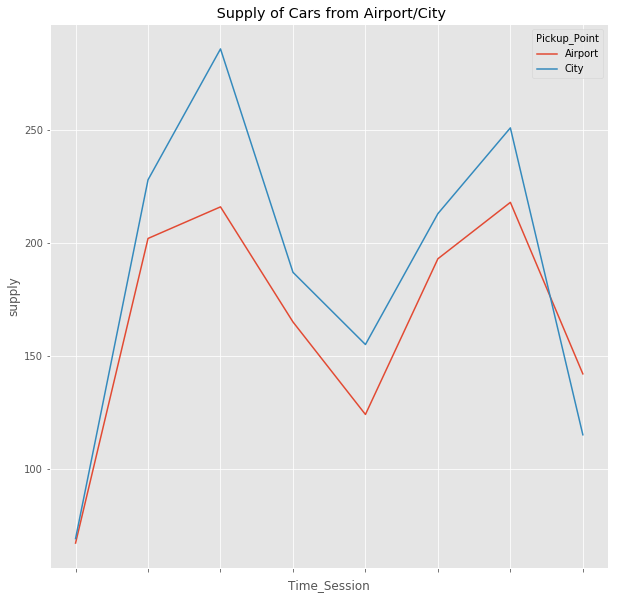

In [114]:
plt.style.use('ggplot')
colors=['r','g','b']
supplyg=supply.groupby(['Time_Session','Pickup_Point']).Pickup_Point.count().unstack().plot.line(legend=True, figsize=(10,10))
plt.title(" Supply of Cars from Airport/City")
#plt.xlabel("Time Session")
plt.ylabel("supply")
plt.show()

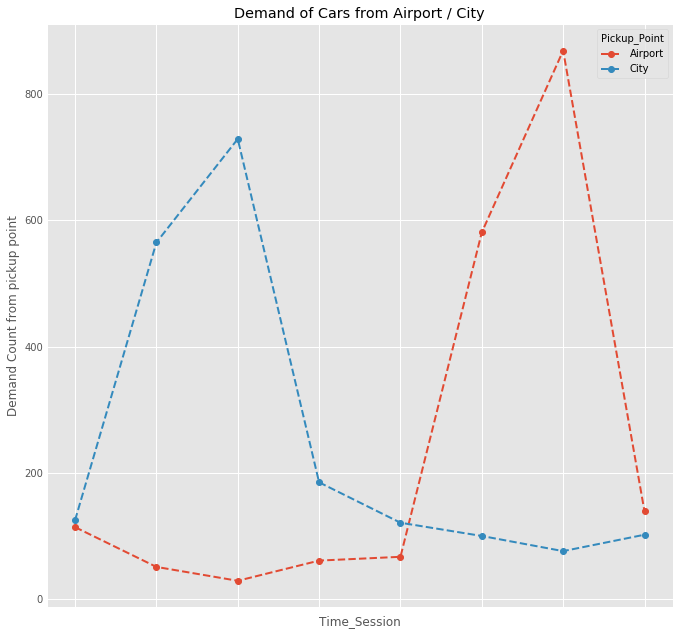

In [125]:
plt.style.use('ggplot')
colors=['r','g','b']
demandg=demand.groupby(['Time_Session','Pickup_Point']).Pickup_Point.count().unstack().plot.line(legend=True, linestyle='--', marker='o',linewidth=2,figsize=(10,10))
plt.title("Demand of Cars from Airport / City")
#plt.xlabel("Day Time_Session")
plt.ylabel("Demand Count from pickup point")
plt.show()

Demand Graph :
    Demand from City-Airport is more in Morning time
    Demand from Airport-City is more in Evening time

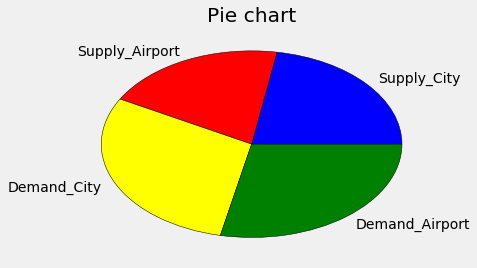

In [121]:
# PIE CHART
plt.style.use("fivethirtyeight")
slice=[len(supply_City),len(supply_Airport), len(demand_City), len(demand_Airport)]
label=['Supply_City', 'Supply_Airport', "Demand_City", "Demand_Airport"]
colors=["blue", "red", "yellow", "green"]
plt.pie(slice, labels=label, colors=colors, wedgeprops={'edgecolor':'black'})

plt.title("Pie chart")
plt.show()

Hypothesis ::

Pickup_Point :City
Cancellation :
    Highest cancellation took place  at 
    Early_Morning( 3AM-6AM)
    Morning      (6AM-9AM)
    Followed by Rush_Morning (9AM-12AM)
    
    
    
Pickup_Point : Airport
Cancellation :
    Many Cancellation from City-to- Airport : "due to heavy traffic
    Cancellation Took place at
    Evening (6AM-9AM) - May be due to heavy rush/Traffic
    Mid-Afternoon -(3AM-6AM)
    
No Cars Available : 
    Mostly at 
    Mid-Afternoon (3AM-6AM)
    Evening (6AM-9AM)
    


Suggestion :
    
For bridging the Demand and Supply gap from TO- From (Airport-City)
    Demand : High        Supply : Low
1. Few Cars Available at Airport : Can Introduce "Uber Taxi Stand" at Airport.
2. Give more incentive to the Drivers for More rides in a week from City-Airport.
3. Add-on incentive to the driver, when rides are between 3AM- 9AM from(City-Airport)
4. Looking to the data the heaviest day is Wednesday for Cancellation and No Car Available.
   Can give more cars on the heavy day="Wednesday" wrt to Time_Session.
5. Looking to the data 300 drivers means 300 cars are avilable, but all are not available at service. 
6. Early morning the City requests is concelled in large numbers by drivers, this issue need to be resolved. Can consider drivers feedback and try to resolve the issue. 
7. Driver may have problem when they return from Airport without a ride, or go to the Airport for pickup witout a ride. (This may be a cause for cancellation/ No Cars Available)

    
    
    
    